In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# df=pd.read_csv('dataset.csv')
df=pd.read_csv('ratio_dataset.csv')
df = df.drop(columns=['step','nameOrig', 'nameDest','isFlaggedFraud'])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [15]:
df['type']=df['type'].map({'PAYMENT':2, 'TRANSFER':4, 'CASH_OUT':1, 'DEBIT':5, 'CASH_IN':3})

In [16]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y=df.iloc[:,-1]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': len(set(y_train)),
    'eval_metric': 'merror'
}

num_rounds = 100
modelXGB = xgb.train(params, dtrain, num_rounds)

y_pred = modelXGB.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 99.35400516795866


In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

99.35400516795866


In [20]:
resultXGB = modelXGB.predict(dtest)
print(confusion_matrix(y_test, y_pred))

[[766   2]
 [  3   3]]


In [21]:
classification_report_RFC = classification_report(y_test, resultXGB)
print(classification_report_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       0.60      0.50      0.55         6

    accuracy                           0.99       774
   macro avg       0.80      0.75      0.77       774
weighted avg       0.99      0.99      0.99       774



Text(0.5, 1.0, 'Accuracy Score: 99.35400516795866')

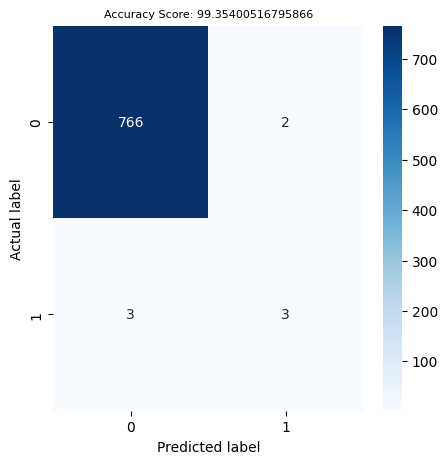

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred),fmt='.0f',annot= True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
accuracy = accuracy_score(y_test, y_pred)
all_sample_title = 'Accuracy Score: {0}'.format(accuracy*100)
plt.title(all_sample_title, size = 8)

In [24]:
import pickle

with open('pkl_models/XGB_model.pkl', 'wb') as model_file:
    pickle.dump(modelXGB, model_file, protocol=2)